In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
tsla=yf.Ticker('tsla')

In [9]:

his=tsla.history(period='max')

In [23]:
gap=20
lentsla=len(his['Close'])
mvavg=[]
pr=[]
stdevupp=[]
stdevdown=[]
ind=[]
for i in range(lentsla-200,lentsla):
    his['Close'][i:i+gap]
    mean=his['Close'][i:i+gap].mean()
    mvavg.append(mean)
    stdevupp.append(mean+2*his['Close'][i:i+gap].std())
    stdevdown.append(mean-2*his['Close'][i:i+gap].std())
    ind.append(i)

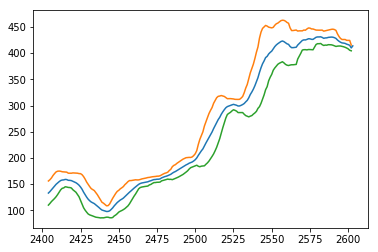

In [27]:
plt.plot(ind,mvavg)
plt.plot(ind,stdevupp)
plt.plot(ind,stdevdown)
plt.show()

In [30]:
pd.DataFrame([mvavg,stdevupp,stdevdown])

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,132.907500,135.773000,139.252000,142.954000,146.252500,149.540500,152.230500,154.649500,156.768500,157.748500,...,422.625000,420.731111,419.468750,419.115714,418.528333,417.076000,416.187500,414.823333,409.895000,413.77
1,155.930108,158.401115,161.779145,166.389508,170.025119,173.229038,174.562264,174.868865,174.503227,173.560815,...,431.669211,427.919352,426.000327,426.087694,425.973604,424.388355,424.313456,424.197822,415.375078,NaN
2,109.884892,113.144885,116.724855,119.518492,122.479881,125.851962,129.898736,134.430135,139.033773,141.936185,...,413.580789,413.542870,412.937173,412.143735,411.083063,409.763645,408.061544,405.448845,404.414922,NaN


In [37]:

table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table[0]['Symbol']

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [45]:
stockticks=list(table[0]['Symbol'])

In [47]:
stockdict={}
for i in stockticks:
    tick=yf.Ticker(i)
    his=tick.history(period='max')
    stockdict[i]=his

- BRK.B: No data found, symbol may be delisted
- BF.B: 1d data not available for startTime=-2208988800 and endTime=1603992571. Only 100 years worth of day granularity data are allowed to be fetched per request.


In [52]:
tick=yf.Ticker('spy')
spy=tick.history(period='max')
aapl=stockdict['AAPL']


In [55]:
pd.merge(aapl,spy,left_index=True,right_index=True)

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
Date,,,,,,,,,,,,,,
1993-01-29,0.45,0.46,0.44,0.44,266100800,0.0,0.0,26.10,26.10,25.97,26.08,1003200,0.0,0
1993-02-01,0.44,0.46,0.44,0.46,240553600,0.0,0.0,26.10,26.27,26.10,26.27,480500,0.0,0
1993-02-02,0.45,0.46,0.45,0.45,182336000,0.0,0.0,26.25,26.34,26.19,26.32,201300,0.0,0
1993-02-03,0.45,0.45,0.43,0.45,264185600,0.0,0.0,26.36,26.62,26.34,26.60,529400,0.0,0
1993-02-04,0.45,0.45,0.44,0.44,208152000,0.0,0.0,26.69,26.77,26.39,26.71,531500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-23,116.39,116.55,114.28,115.04,82572600,0.0,0.0,345.93,345.99,343.13,345.78,49143900,0.0,0
2020-10-26,114.01,116.55,112.88,115.05,111850700,0.0,0.0,342.13,342.98,335.62,339.39,91473000,0.0,0
2020-10-27,115.49,117.28,114.54,116.60,92276800,0.0,0.0,339.76,340.12,337.99,338.22,65994100,0.0,0


In [56]:
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.10,0.10,0.10,0.10,469033600,0.0,0.0
1980-12-15,0.10,0.10,0.10,0.10,175884800,0.0,0.0
1980-12-16,0.09,0.09,0.09,0.09,105728000,0.0,0.0
1980-12-17,0.09,0.09,0.09,0.09,86441600,0.0,0.0
1980-12-18,0.09,0.09,0.09,0.09,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2020-10-23,116.39,116.55,114.28,115.04,82572600,0.0,0.0
2020-10-26,114.01,116.55,112.88,115.05,111850700,0.0,0.0
2020-10-27,115.49,117.28,114.54,116.60,92276800,0.0,0.0


In [88]:
tick=yf.Ticker('spy')
spy=tick.history(period='max')
aapl=stockdict['AAPL']


In [102]:
del stockdict['BRK.B']
del stockdict['BF.B']

In [164]:
y=[]
x=[]
tickers=[]
for tick in stockdict.keys():
    gap=5
    pred=5
    sec=stockdict[tick]
    merged=pd.merge(spy,sec,left_index=True,right_index=True)
    lenstock=len(merged)-gap-pred
    start=random.choice(range(0,lenstock))
    mvavg=[]
    pr=[]
    stdevupp=[]
    stdevdown=[]
    ind=[]
    osc=[]
    prs=[]
    prpred=[]
    spypr=[]
    spyprpred=[]
    for i in range(start,start+gap):
        mean=merged['Close_x'][i:i+gap].mean()
        mvavg.append(mean)
        stdevupp.append(mean+2*merged['Close_x'][i:i+gap].std())
        stdevdown.append(mean-2*merged['Close_x'][i:i+gap].std())
        ind.append(i)
        osc.append((merged['Close_x'][i]-merged['Close_x'][i+gap])/merged['Close_x'][i+gap])
        prs.append(merged['Close_x'][i])
        prpred.append(merged['Close_x'][i+pred])
        spypr.append(merged['Close_y'][i])
        spyprpred.append(merged['Close_y'][i+pred])
    tempdf=pd.DataFrame([mvavg,stdevupp,stdevdown,osc])
    tempdf=tempdf.T
    tempmerged=merged[start:start+gap]
    tempdf.index=tempmerged.index
    returnsst=[]
    returnspy=[]
    for i in range(0,len(prs)):
        returnsst.append(prpred[i]-prs[-1])
        returnspy.append(spyprpred[i]-spypr[-1])
    observed=(sum(returnsst)/len(returnsst)-sum(returnspy)/len(returnspy))/statistics.stdev(returnsst)
    y.append(observed)
    tickers.append(tick)
    x.append(pd.merge(tempdf,tempmerged,right_index=True,left_index=True))

In [207]:
tickers[3]

'ABMD'

In [128]:
sum(returnsst)/len(returnsst)

3.756000000000006

In [134]:
(sum(returnsst)/len(returnsst)-sum(returnspy)/len(returnspy))/statistics.stdev(returnsst)

12.635636730665874

In [132]:
import statistics

In [133]:
statistics.stdev(returnsst)

0.7179693586776555